# House Prices: Advanced Regression Techniques

21-7-2018

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.


In [73]:
# Documentação de consulta
# http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/


### Data Description
MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

BldgType: Type of dwelling

Conversion; originally built as one-family dwelling
       
HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

YearBuilt: Original construction date Year

RemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 

ExterCond: Evaluates the present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area Total

BsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

Romex wiring (Average)

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

Low
QualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

Fireplace in main living area or Masonry Fireplace in basement
  
GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories
 
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

SaleCondition: Condition of sale

In [29]:
# load the python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# leitura do arquivo
df_train = pd.read_csv("house_prices_train.csv")
df_test  = pd.read_csv('house_prices_test.csv')

In [4]:
# Analise informações arquivos
df = df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Informações   numericas:
 <br> SalePrice - Preço   
 <br> YrSold - Ano de venda
 <br> MoSold - Mes de venda
 <br> MiscVal: $Value of miscellaneous feature - Valor de melhorias aplicadas no imovel   
 <br> PoolArea - are de piscina
 <br>  OpenPorchSF- Área de varanda aberta 
 <br>  WoodDeckS - Área de deck de madeira
 <br>  GarageCars: Size of garage in car capacity
 <br> GarageArea: Size of garage
 <br> Fireplaces - Number of fireplaces - NUmero lareiras
 <br> 1stFlrSF: First Floor square feet (m2 do 1 andar)
 <br> TotRmsAbvGrd: Total de quartos acima do nível (não inclui banheiros)
 <br> FullBath: banheiros completos acima do nível
 <br> Kitchen: Kitchens above grade (n. cozinhas)
 <br> LotFrontage: Pés lineares de rua conectados à propriedade
 <br> LotArea: Tamanho do lote em pés quadrados

### $Temos:  1460,   entries$:

temos registos com várias informações nulas, sendo as mais significativas:
<br>- PoolQC(piscina)  7 non-null object
<br>- Fence(cerca)     281 non-null objec
<br>- MiscFeature(melhorias)      54 non-null object
<br>- FireplaceQu(lareira)      770 non-null object
<br>- Alley(rua)                 91 non-null object

In [74]:
# Contar dados nulos em cada coluna
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploração e visualização de dados

In [6]:
# medidas estatisticas
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analise de colunas numericas
Observa-se que há colunas com valores muito dispares na avaliação coluna a coluna. Isto pode ser observado pelo valores minimo e maximo das colunas numéricas
<br> -----------------------min  --- max
<br> LotFrontage =   21.0  -  313.0
<br> LotArea     = 1300.0   -  215245.0
<br> MasVnrArea(area alvenaria) = 0.0 - 1600.0
<br> MiscVal(melhorias)  = 0.0 - 15500.0


In [5]:
# Informaçoes de tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 1. Univariate analysis

### A distribuição da variável alvo e das características individuais  
<br>Para se ter uma ideia da distribuição das variáveis numéricas, fazer os histogramas.
<br> Vamos começar gerando um para SalePrice, nossa variável alvo.

(array([  11.,   38.,   99.,  232.,  273.,  218.,  176.,  104.,   93.,
          58.,   42.,   35.,   24.,   10.,   17.,    8.,    7.,    4.,
           2.,    1.,    1.,    2.,    1.,    0.,    2.,    0.,    0.,
           0.,    0.,    2.]),
 array([  34900.        ,   58903.33333333,   82906.66666667,
         106910.        ,  130913.33333333,  154916.66666667,
         178920.        ,  202923.33333333,  226926.66666667,
         250930.        ,  274933.33333333,  298936.66666667,
         322940.        ,  346943.33333333,  370946.66666667,
         394950.        ,  418953.33333333,  442956.66666667,
         466960.        ,  490963.33333333,  514966.66666667,
         538970.        ,  562973.33333333,  586976.66666667,
         610980.        ,  634983.33333333,  658986.66666667,
         682990.        ,  706993.33333333,  730996.66666667,  755000.        ]),
 <a list of 30 Patch objects>)

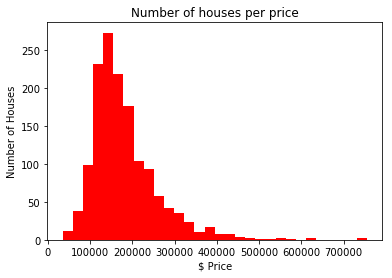

In [21]:
plt.title("Number of houses per price")
plt.xlabel("$ Price")
plt.ylabel("Number of Houses")
plt.hist(df.SalePrice, bins=30,  align=('mid'), color=['red'], label=['A'])


O maior numero de ofertas regista-se em casas com preço entre $100.000,00 , e:  $200.000,00

Imediatamente, vemos que a distribuição é para casas mais baratas, com uma cauda relativamente longa
para casas com preços altos. Para tornar a distribuição mais simétrica, podemos fazer o histograma do logaritmo:
    

(array([   3.,    2.,    0.,    2.,    3.,    7.,    5.,   10.,   39.,
          35.,   49.,  100.,  138.,  186.,  146.,  156.,  142.,  102.,
         100.,   68.,   52.,   44.,   22.,   24.,   12.,    4.,    3.,
           3.,    1.,    2.]),
 array([ 10.46024211,  10.56271647,  10.66519084,  10.7676652 ,
         10.87013956,  10.97261393,  11.07508829,  11.17756266,
         11.28003702,  11.38251138,  11.48498575,  11.58746011,
         11.68993448,  11.79240884,  11.8948832 ,  11.99735757,
         12.09983193,  12.2023063 ,  12.30478066,  12.40725502,
         12.50972939,  12.61220375,  12.71467812,  12.81715248,
         12.91962684,  13.02210121,  13.12457557,  13.22704994,
         13.3295243 ,  13.43199866,  13.53447303]),
 <a list of 30 Patch objects>)

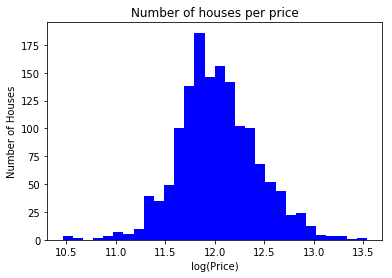

In [25]:
plt.title("Number of houses per price")
plt.xlabel("log(Price)")
plt.ylabel("Number of Houses")
plt.hist(np.log(df.SalePrice), bins=30,  align=('mid'), color=['blue'], label=['A'])

Além de tornar a distribuição mais simétrica, trabalhar com o logaritmo do preço de venda também garantirá que erros relativos de casas mais baratas e mais caras sejam tratados em pé de igualdade.

### Analise de variaveis Categorical 

Para variáveis categóricas, gráficos de barras e contagens de frequência são as analises naturais para os histogramas

In [33]:
# Analisando o Tipo de Construção (Foundation)
x= df.Foundation.value_counts()
x

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Foundation: Type of foundation:
<br>-BrkTil= 	Brick & Tile
<br>-CBlock= 	Cinder Block
<br>-PConc= 	Poured Contrete
<br>-Slab= 	Slab
<br>-Stone=	Stone
<br>-Wood=	Wood
<br><br>
Quase todas as casas são feitas de concreto, sendo blocos de concreto ou concreto apenas.

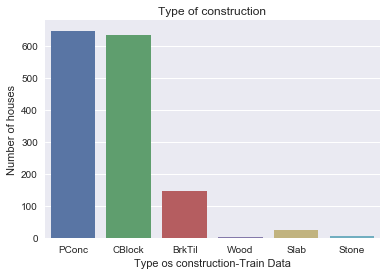

In [37]:
ax=sns.countplot(df.Foundation)
ax.set_title('Type of construction')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Type os construction-Train Data')

Analisando a mesma informação nos dados de teste (df_test), abaixo, vemos que têm o mesmo comportamento dos dados de treino

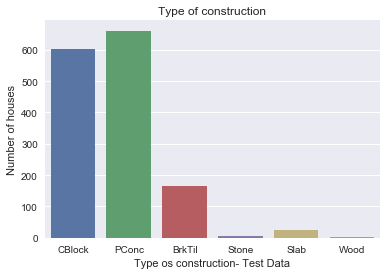

In [38]:
ax=sns.countplot(df_test.Foundation)
ax.set_title('Type of construction')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Type os construction- Test Data')

## 2. Bivariate analysis

Tendo analisado algumas das variáveis individualmente, vamos explorar as relações entre elas. 
Naturalmente, o mais interessante será o relacionamento entre a variável de destino (preço de venda) 
e os recursos que usaremos para a previsão.

Para recursos numéricos, os gráficos de dispersão são a ferramenta de referência. Como a área de vida total de uma casa provavelmente é um fator importante para determinar seu preço, vamos criar uma para GrLivArea e SalePrice. Nós vamos plotar a área de estar contra o log do preço de venda, bem como para comparação.

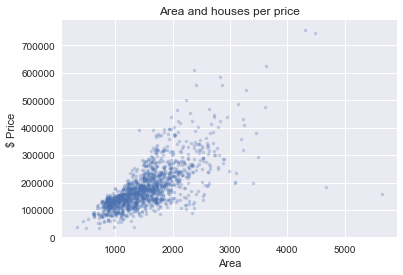

In [64]:
# Plot da area versus o preço
plt.plot(df_train.GrLivArea, df_train.SalePrice,'.', alpha = 0.3)
plt.title("Area and houses per price")
plt.ylabel("$ Price")
plt.xlabel("Area")

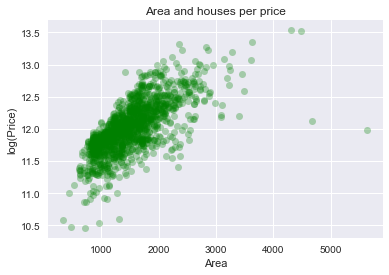

In [72]:
# Plot da area versus o logaritmo do preço 
plt.plot(df_train.GrLivArea, np.log(df_train.SalePrice),'o', color=('green'),alpha = 0.3)
plt.title("Area and houses per price")
plt.ylabel("log(Price)")
plt.xlabel("Area")

Há uma forte dependência do preço de venda da área total de moradia. 
Como esperado, quanto maior a casa, mais cara ela tende a ser.
Há claramente uma tendência de aumento do preço de venda com a área, 
mas também vemos alguns pontos que parecem não se encaixar no resto. 
Há casas (poucas) em que o padrão relativo à area / preço não se encaixa.

Esperaríamos que YearBuilt (ano da construção) e GarageYrBlt (ano de construção da garagem) estivessem perfeitamente relacionados, então vamos criar um gráfico de dispersão para eles. Como não estamos considerando o SalePrice, podemos usar dados de treinamento e teste.

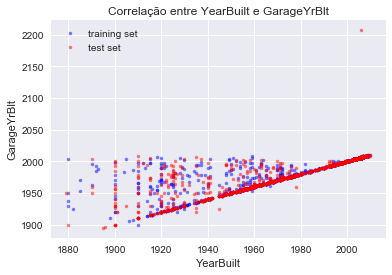

In [70]:
# Plot train Data 
plt.plot(df_train.YearBuilt, df_train.GarageYrBlt,
         '.', alpha=0.5, color=('blue'), label = 'training set')
# Plot test Data 
plt.plot(df_test.YearBuilt, df_test.GarageYrBlt,
         '.', alpha=0.5, color=('red'), label = 'test set')

plt.title("Correlação entre YearBuilt e GarageYrBlt")
plt.ylabel("GarageYrBlt")
plt.xlabel("YearBuilt")
plt.legend()

Como seria de esperar, a figura nos diz que a maioria das garagens foi construída ao mesmo tempo que as casas a que pertencem: elas formam a linha diagonal que atravessa o terreno.
Um número significativo também foi adicionado depois: estes são os pontos acima da linha. 

Em ambos os conjuntos de treinamento e teste, temos várias garagens que foram construídas até 20 anos
antes de suas casas (os pontos abaixo da linha diagonal), e no conjunto de treinamento nós temos uma garagem no futuro onde o registro mostra que foi construído em ano acida de 2018 (atual). Estes valores poderiam ser corrigidos, para ficarem pelo menos no ano de construção da casa.

## Categorical variables

Vamos dar uma olhada em alguns exemplos de preço de venda em função da vizinhança.
Outro recurso que provavelmente será importante para nossos modelos preditivos.

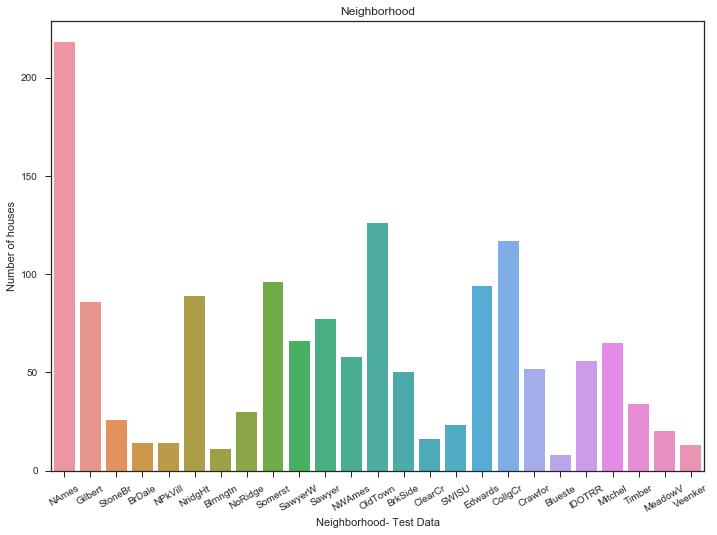

In [97]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.violinplot(ax=ax, data=df_test.Neighborhood)
g = sns.countplot(df_test.Neighborhood)
ax.set_title('Neighborhood')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Neighborhood- Test Data')
# Rotação das Labels
g.set_xticklabels(g.get_xticklabels(), rotation=30)

O maior numero de casas situa-se em NAames, seguido de Old Town e CollgCr.

In [99]:
# Plot da area versus o preço
plt.plot(df_train.Neighborhood, df_train.SalePrice,'.', alpha = 0.3)
plt.title("Neighborhood and houses per price")
plt.ylabel("$ Price")
plt.xlabel("Neighborhood")

AttributeError: 'DataFrame' object has no attribute 'Saleprice'

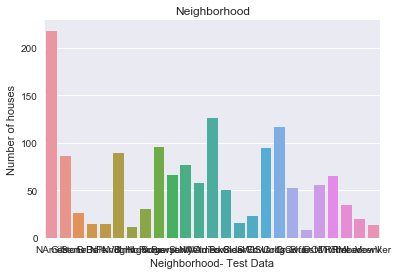

In [77]:
ax=sns.countplot(df_test.Neighborhood)
ax.set_title('Neighborhood')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Neighborhood- Test Data')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C215208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D398B00>]], dtype=object)

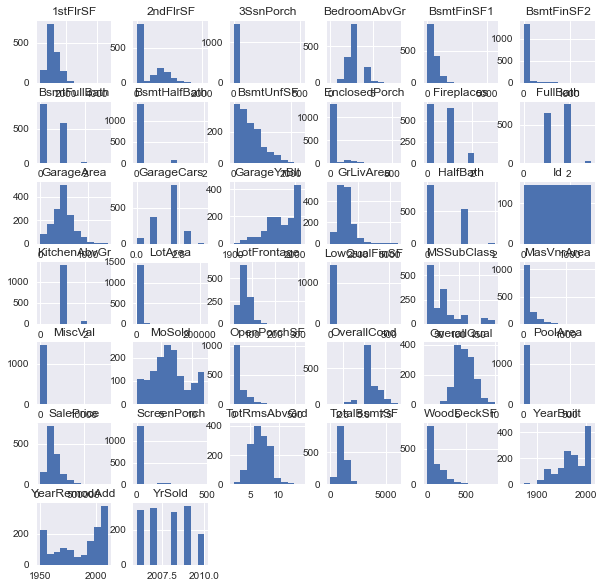

In [8]:
df.hist(figsize = (10,10))

In [9]:
alpha = df.columns
alpha

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

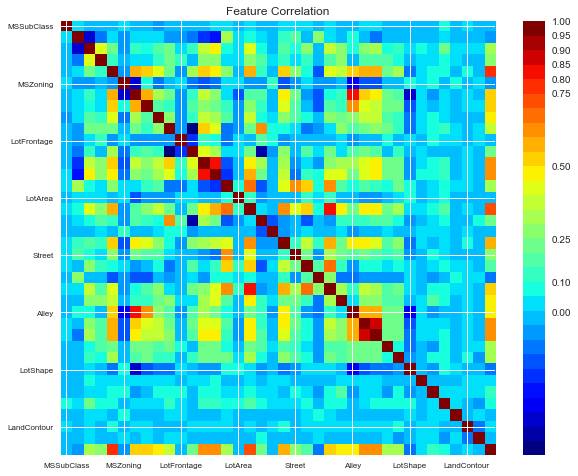

In [10]:
# Correlação das caracteristicas
# quanto mais perto de 1 mais relacionadas são as carateristica
alpha = df.columns

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=alpha
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,5,0.10,0.25,0.50,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

In [ ]:
Com base neste grafico, os pontos escuros mostram a correlação de variáveis.
<br> o MSZoning (zona) tem relação com a Alley (tipo acesso à propriedade)
<br>

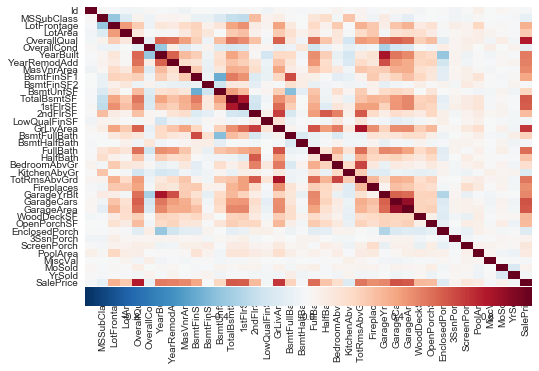

In [11]:
grid_kws = {"height_ratios": (1.5, 0.1), "hspace": 0.01}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(df.corr(), ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

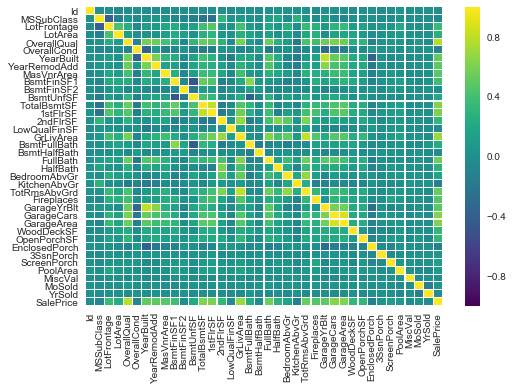

In [12]:
result = df.corr()
sns.heatmap(result, annot=False, fmt="g", cmap='viridis', cbar=True, linewidths=.05)
plt.show()

Com base neste grafico, os pontos mais claros mostram a correlação de variáveis.
<br> o MSZoning (zona) tem relação com a Alley (tipo acesso à propriedade)
<br> A qualidade geral (OverallQual) tem relação com o Preço (Salesprice)
<br> Outras correlações importantes para o preço são:
    <br> -- Area 1 piso e area 2 piso 
    <br> -- o ano em que foram feitas melhorias 
    <br> -- O ano da construção
    <br> -- m2 da area de sala de estar
    <br> -- numero de quartos
    <br> -- numero de banheiros
    <br> -- numero de lareiras
    <br> -- area de garagem e numero de lugares de garagem
<br> De um modo geral o ano de construção, a qualidade geral do imovel, a área e o numero de quartos, lideram o padrão para determinação do preço.


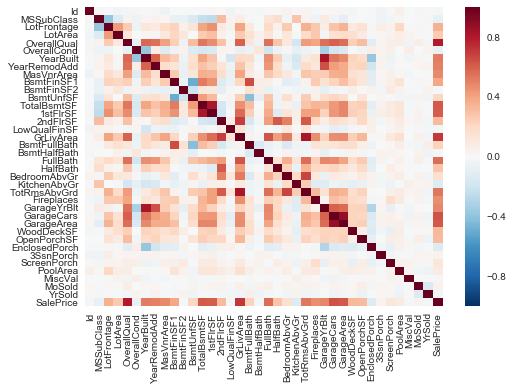

In [13]:
# Analise de correlação entre os dados
# df.corr() determina a correlação entre as variaveis
# mais claro é maior correlação
# quanto mais perto de 1 mais relacionadas são as carateristica
sns.heatmap(df.corr(), annot = False)

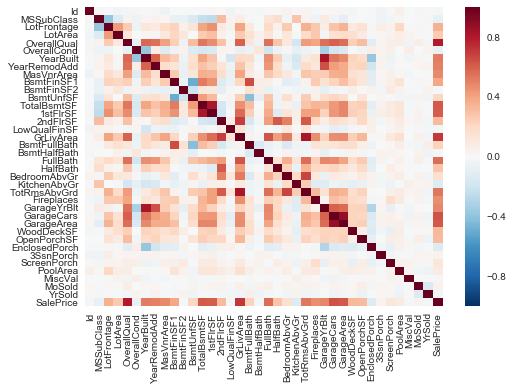

In [14]:
# Analise de correlação entre os dados
# df.corr() determina a correlação entre as variaveis
# mais claro é maior correlação
# quanto mais perto de 1 mais relacionadas são as carateristica
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

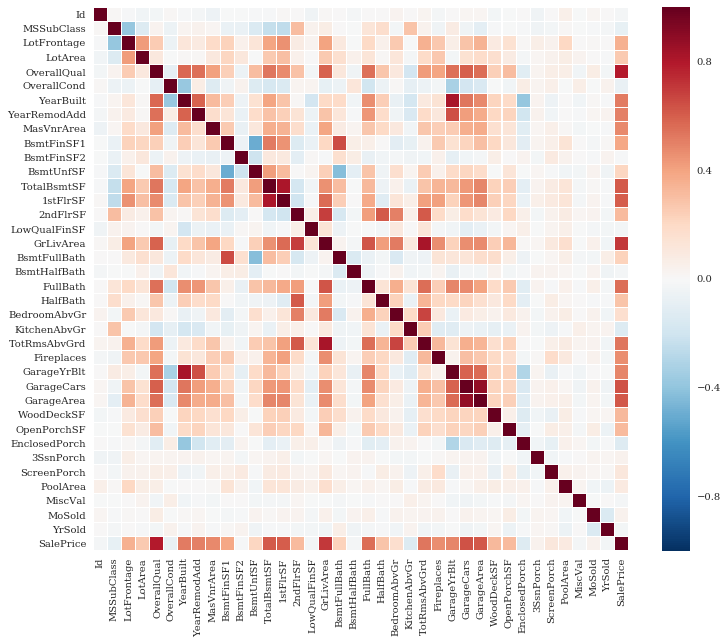

In [15]:
# Analise de correlação entre os dados
corr = df.corr()
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.heatmap(corr,linewidths=.05)

Com base neste grafico, os pontos mais escuros mostram a correlação de variáveis.
<br> o MSZoning (zona) tem relação com a Alley (tipo acesso à propriedade)
<br> A qualidade geral (OverallQual) tem relação com o Preço (Salesprice)
<br> Outras correlações importantes para o preço são:
    <br> -- Area 1 piso e area 2 piso 
    <br> -- o ano em que foram feitas melhorias 
    <br> -- O ano da construção
    <br> -- m2 da area de sala de estar
    <br> -- numero de quartos
    <br> -- numero de banheiros
    <br> -- numero de lareiras
    <br> -- area de garagem e numero de lugares de garagem
<br> De um modo geral o ano de construção, a qualidade geral do imovel, a área e o numero de quartos, lideram o padrão para determinação do preço.


In [17]:
list = df.columns
list

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
# Das 1460 linhas de treino, praticamente não temos valores para as colunas:
# - PoolQC, Fence,MiscFeature e Alley 
# Vamos eliminar estas colunas
df1 = pd.DataFrame(df)
 
list = ['Alley','PoolQC','Fence','MiscFeature']
df1 = df1.drop(list, axis=1)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
list = df1.columns
list

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [20]:
df2 = df1[['MSZoning','SalePrice']]

In [ ]:
df2.head()

In [ ]:
# colocar para plotar a classe em analise "SalePrice"
#sns.pairplot(df1, hue = "SalePrice")